Data Cleaning and Preprocessing

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read csv file
df = pd.read_csv('commits.csv')
df['Commited Date'] = pd.to_datetime(df['Commited Date'])
df = df.sort_values(by='Commited Date')
df.index = [i for i in range(1,df.shape[0]+1)]

# Correcting the Contributor column
for i in range(1,df.shape[0]+1):
    if df.loc[i,'Author'] == df.loc[i,'Contributor']:
        df.loc[i,'Contributor'] = df.loc[i,'Author'].replace(' ','')
# Detect which Authors changed their Github name and change their Contributor id to the latest time
dict = {df.loc[i,'Author'] : df.loc[i,'Contributor'] for i in range(1,df.shape[0]+1)}
for i in range(1,df.shape[0]+1):
    df.loc[i,'Contributor'] = dict[df.loc[i,'Author']]
# Set commited date as index
df.set_index('Commited Date', inplace=True)
df['Month'] = df.index.to_period('M')
df.head()

None


In [3]:
date_df = pd.DataFrame(index=np.unique(df.index.values))
date_df.index.name = 'Months'
date_df['Count'] = df.index.value_counts()
date_df['Month'] = date_df.index.to_period('M')
date_df.head()

,Count,Month
Months,,
2023-01-02,15,2023-01
2023-01-03,5,2023-01
2023-01-04,4,2023-01
2023-01-05,3,2023-01
2023-01-06,1,2023-01


Top 5 Months with the most Commits

In [4]:
monthly_counts = date_df.groupby('Month')['Count'].sum()
monthly_counts.sort_values(ascending=False).head()

Month
2023-08    280
2023-07    273
2023-09    266
2023-10    255
2023-11    207
Freq: M, Name: Count, dtype: int64

Visualization

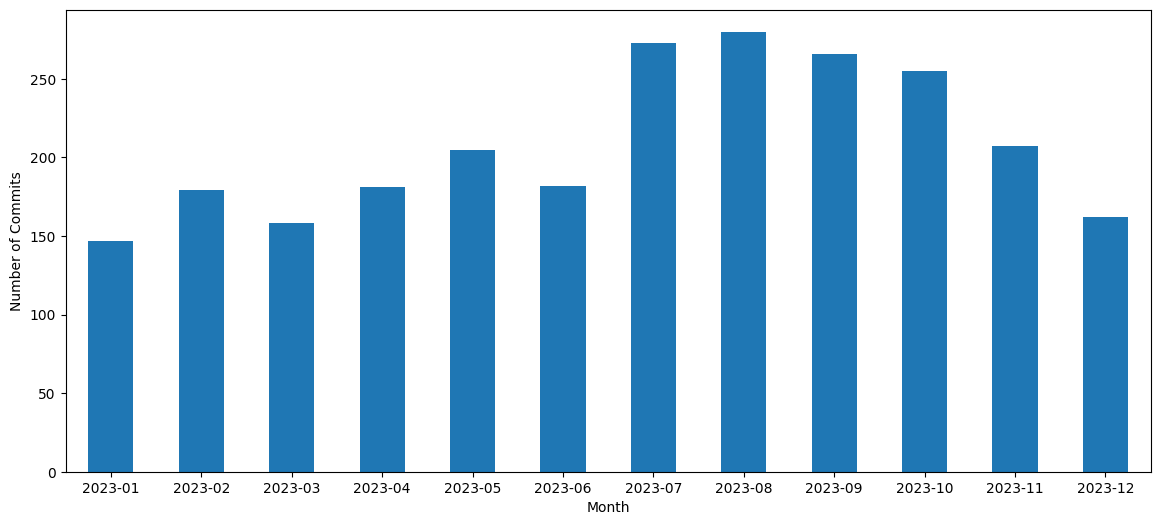

In [5]:
monthly_counts.plot.bar(ylabel="Number of Commits", figsize=(14, 6))
plt.xticks(rotation=0) 
plt.show()

Total Contributors in 2023

In [6]:
df['Author'].unique().size

256

Setting up a dataframe for Contributors

In [7]:
contributor_df = pd.DataFrame(index=df['Contributor'].unique())
contributor_df.index.name = 'Contributor'
contributor_df['Author'] = df['Author'].unique()
contributor_df['Total Commits'] = df['Contributor'].value_counts()
rates = {}
for i in df['Contributor'].unique():
    rate = df['Passed'][(df['Contributor'] == i) & (df['Passed'] == 'Success')].size
    rates[i] = str(rate/df['Passed'][df['Contributor'] == i].size*100) + '%'
contributor_df['Success Rate'] = rates
contributor_df

,Author,Total Commits,Success Rate
Contributor,,,
ZeeshanTamboli,Zeeshan Tamboli,71,67.6056338028169%
oliviertassinari,Olivier Tassinari,354,50.847457627118644%
hbjORbj,Benny Joo,71,84.50704225352112%
renovate[bot],renovate[bot],737,37.58480325644505%
mnajdova,Marija Najdova,83,69.87951807228916%
...,...,...,...
adamhylander,adamhylander,1,0.0%
muazaqdas,Muaz Aqdas,1,0.0%
Kamino0,Kamino0,1,100.0%


Top 5 Contributors in 2023

In [8]:
contributor_df.sort_values(by = 'Total Commits', ascending=False, inplace=True)
contributor_df.head()

,Author,Total Commits,Success Rate
Contributor,,,
renovate[bot],renovate[bot],737,37.58480325644505%
oliviertassinari,Olivier Tassinari,354,50.847457627118644%
danilo-leal,Danilo Leal,146,55.47945205479452%
sai6855,sai chand,106,62.264150943396224%
siriwatknp,Siriwat K,99,73.73737373737373%


In [37]:
contributor_commits = df.groupby('Month')['Contributor'].value_counts().unstack(fill_value=0)
for i in df['Contributor'].unique():
    contributor_commits.drop(i,axis=1,inplace=True) if i != 'renovate[bot]' and i!='oliviertassinari' and i!='danilo-leal' and i!='sai6855' and i!='siriwatknp' else i
contributor_commits.index.name = 'Months'
contributor_commits

Contributor,danilo-leal,oliviertassinari,renovate[bot],sai6855,siriwatknp
Months,,,,,
2023-01,0,21,41,9,10
2023-02,2,21,53,8,16
2023-03,2,20,35,11,12
2023-04,7,22,42,12,11
2023-05,6,8,73,9,8
2023-06,13,32,60,6,8
2023-07,11,48,83,8,9
2023-08,37,51,68,8,6
2023-09,23,54,65,14,5


<Axes: xlabel='Months', ylabel='Commits'>

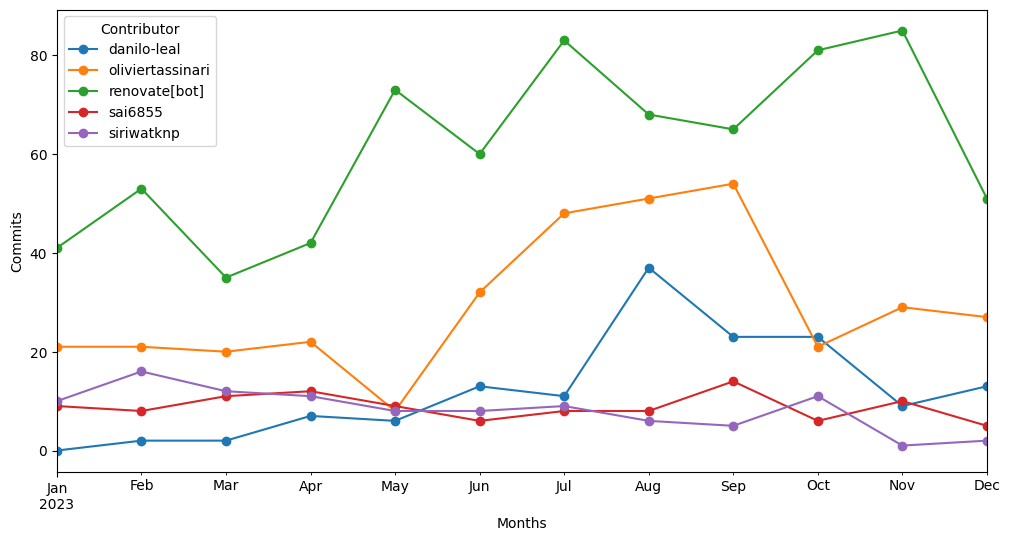

In [19]:
contributor_commits.plot(kind='line', marker='o',ylabel = 'Commits',figsize=(12,6))